In [ ]:
# orchestrator.py

from langgraph.graph import StateGraph, MessagesState, START, END

# Import agent functions
# from agents.coordinator import coordinator

# Import Retriever agent functions
from agents.retrievers.bm25_agent import bm25_agent
from agents.retrievers.e5_agent import e5_agent
from agents.retrievers.specter_agent import specter_agent

# from agents.llm_agent import llm_agent
# from agents.formulators.query_reformulator import query_reformulator
# from agents.formulators.aggregator_agent import aggregator_agent
from agents.formulators.reranker import reranker
# from agents.verifier_agent import verifier_agent

def query(state):
    pass

def aggregator_agent(state):
    pass

############################################################
# 1️⃣  BUILD THE STATE GRAPH (use MessagesState!)
############################################################

# IMPORTANT: Studio REQUIRES MessagesState or Annotated fields
graph = StateGraph(MessagesState)

############################################################
# 2️⃣  ADD AGENTS (nodes)
############################################################

graph.add_node("query", query)
# graph.add_node("coordinator", coordinator)
graph.add_node("bm25", bm25_agent)
graph.add_node("e5", e5_agent)
graph.add_node("specter", specter_agent)
# graph.add_node("llm", llm_agent, tags=["retriever"])
graph.add_node("aggregator", aggregator_agent)  # Placeholder aggregator agent
# graph.add_node("verifier", verifier_agent, tags=["agent"])
graph.add_node("reranking", reranker)
############################################################
# 3️⃣  ADD EDGES
############################################################

# Start → Query query -> Coordinator
graph.add_edge(START, "query")
# graph.add_edge("query", "coordinator")

# Coordinator fans out to all retrieval agents
graph.add_edge("query", "bm25")
graph.add_edge("query", "e5")
graph.add_edge("query", "specter")
# graph.add_edge("coordinator", "llm")

# All retrieval agents → aggregator agent
graph.add_edge("bm25", "aggregator")
graph.add_edge("e5", "aggregator")
graph.add_edge("specter", "aggregator")
# graph.add_edge("llm", "aggregator")

# aggregator -> Verifier agent -> END
graph.add_edge("aggregator", "reranking")
graph.add_edge("reranking", END)
# graph.add_edge("verifier", END)

############################################################
# 4️⃣ EXPOSE PIPELINE FOR LANGGRAPH STUDIO
############################################################

pipeline = graph.compile()

/Users/ishaankalra/Dev/Retrieval/server/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔧 Loading BM25 corpus...


📚 Indexed 9740 documents for BM25.
Loaded 1000 papers from ScholarCopilot dataset.
Corpus size: 1000 papers
Loading dense retriever model: intfloat/e5-large-v2
Model loaded on device: mps
Creating corpus embeddings:


Batches: 100%|██████████| 63/63 [01:45<00:00,  1.67s/it]


Loaded 1000 papers from ScholarCopilot dataset.
Corpus size: 1000 papers
[SPECTER] Loading tokenizer/model on CPU: allenai/specter2_base


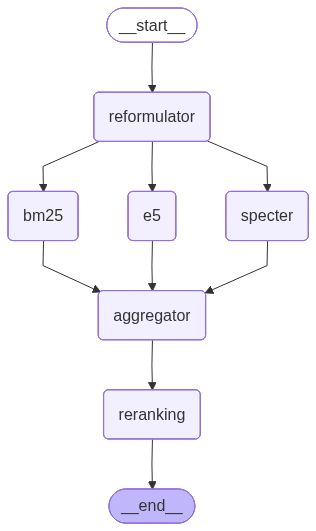

In [2]:
from IPython.display import Image

graph_image = pipeline.get_graph().draw_mermaid_png()
Image(graph_image)